<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - From a URL (github or otherwise)
 - CSV upload method
 - !wget method
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Data Imputation"
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot (if we have time)

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  92363      0 --:--:-- --:--:-- --:--:-- 92363
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Steps of Loading and Exploring a Dataset:

- Find a dataset that looks interesting
- Learn what you can about it 
 - What's in it? 
 - How many rows and columns? 
 - What types of variables?
- Look at the raw contents of the file
- Load it into your workspace (notebook)
 - Handle any challenges with headers
 - Handle any problems with missing values
- Then you can start to explore the data
 - Look at the summary statistics
 - Look at counts of different categories
 - Make some plots to look at the distribution of the data

## 3 ways of loading a dataset

### From its URL

In [0]:
import pandas as pd
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# column_headers = [ add these from site then add to next line]
df = pd.read_csv(dataset_url)

In [9]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### From a local file

In [1]:
from google.colab import files
uploaded = files.upload()

### Using the `!wget` command

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-09-06 02:41:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  15.7MB/s    in 0.2s    

2019-09-06 02:41:11 (15.7 MB/s) - ‘adult.data’ saved [3974305/3974305]



In [6]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -O adult.data.2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k  100 3881k    0     0  10.0M      0 --:--:-- --:--:-- --:--:-- 10.0M
curl: (6) Could not resolve host: adult.data.2


In [12]:
df = pd.read_csv("adult.data", na_values="")
df.head(15)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Part 2 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [16]:
import numpy as np
df = pd.read_csv('adult.data')
df=df.replace(" ?", np.NaN)
df.head(15)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


## Fill Missing Values

In [17]:
df.fillna('unknown')

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Part 3 - Explore the Dataset:

In [18]:
df.isna().sum()

39                   0
 State-gov        1836
 77516               0
 Bachelors           0
 13                  0
 Never-married       0
 Adm-clerical     1843
 Not-in-family       0
 White               0
 Male                0
 2174                0
 0                   0
 40                  0
 United-States     583
 <=50K               0
dtype: int64

In [19]:
df.iloc[14]

39                                 34
 State-gov                    Private
 77516                         245487
 Bachelors                    7th-8th
 13                                 4
 Never-married     Married-civ-spouse
 Adm-clerical        Transport-moving
 Not-in-family                Husband
 White             Amer-Indian-Eskimo
 Male                            Male
 2174                               0
 0                                  0
 40                                45
 United-States                 Mexico
 <=50K                          <=50K
Name: 14, dtype: object

In [21]:
df['native-country'].iloc[12]

KeyError: ignored

In [22]:
df.index

RangeIndex(start=0, stop=32560, step=1)

In [23]:
range(0,32561)

range(0, 32561)

In [24]:
df['age']

KeyError: ignored

In [0]:
df[['age', 'education']]

In [25]:
# Get all people from India by:
df[df['native-country'] == ' India']

KeyError: ignored

In [0]:
df[df['education'] == ' Bachelors') & (df['native-country'] == ' India')]

In [26]:
df[df['native-country'] == ' India'].shape
df[df['native-country'] == ' India'].value_counts()

KeyError: ignored

## Look at "Summary Statistics

### Numeric

In [27]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
df.describe(percentiles=[.1, .2, .3, .4])

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
10%,22.000000,6.571500e+04,7.000000,0.000000,0.000000,24.000000
20%,26.000000,1.066656e+05,9.000000,0.000000,0.000000,35.000000
30%,30.000000,1.308560e+05,9.000000,0.000000,0.000000,40.000000
40%,33.000000,1.586728e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
df.describe(exclude="number")

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
count,30724,32560,32560,30717,32560,32560,32560,31977,32560
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [32]:
df.describe(exclude="number").T  # transpose DF, organizes it vertically

,count,unique,top,freq
State-gov,30724,8,Private,22696
Bachelors,32560,16,HS-grad,10501
Never-married,32560,7,Married-civ-spouse,14976
Adm-clerical,30717,14,Prof-specialty,4140
Not-in-family,32560,6,Husband,13193
White,32560,5,White,27815
Male,32560,2,Male,21789
United-States,31977,41,United-States,29169
<=50K,32560,2,<=50K,24719


In [33]:
df['martial-status'].value_counts()

KeyError: ignored

In [0]:
df['martial-status'].value_counts(normalize=True) # normalizes it, it divides all numbers by size of dataset

###Non-Numeric

## Look at Categorical Values

# Part 4 - Basic Visualizations (using the Pandas Library)

## Histogram

In [36]:
# Pandas Histogram 
df['age'].hist(bins=30)

KeyError: ignored

## Density Plot (KDE)

In [0]:
# Pandas Density Plot
df['age'].plot.density()

## Scatter Plot

In [0]:
# Pandas Scatterplot
df.plot.scatter('age', 'hours-per-week')

In [39]:
# Bonus dataset
# https://raw.githuhttps://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv
bike_data_url = "https://raw.githuhttps://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv"
df = pd.read_csv(bike_data_url,
                 encoding='latin1',
                 sep=';'
                parse_dates=['Date'],
                dayfirst=True,
                index_col='Date')

SyntaxError: ignored

In [40]:
df.head(3)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [42]:
# libray Unidecode 1.1.1 - allows us to convert different encodings
# ! pip install unidecode
!pip install unidecode

     |████████████████████████████████| 245kB 5.0MB/s 


In [43]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [45]:
unidecode.unidecode("Brebuf").lower()

NameError: ignored

In [49]:
# on multiple strings using list comprehension
list_1 = [10, 20, 30]
# want to create a list # 2 and divide all numbers in list 1 by 10
# could do by loop
list_2 = []
for i in list_1: 
  list_2.append(i//10)
list_2

[1, 2, 3]

In [0]:
# But can be done quicker in less lines
list_2 = [i//10 for i in list_1]

In [48]:
list_2

[1, 2, 3]

In [0]:
# for every item in firstl ist, i want to get an item division by 10 in list2

In [50]:

new_cols = [unidecode.unidecode(col).lower() for col in df.columns]
new_cols
df.head()

NameError: ignored

In [0]:
df['berri 1']

# 2 ways to acces scolumns in pandas
# df.rachell or df['rachell']
# Prefers with df[], easier to spot and cant use mult with variables that have mult


In [0]:
# Lets plot the data
df['berri 1'].plot() 

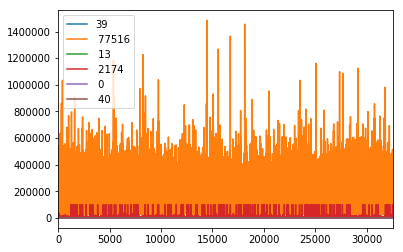

In [51]:
df.plot() # looks at entire data set

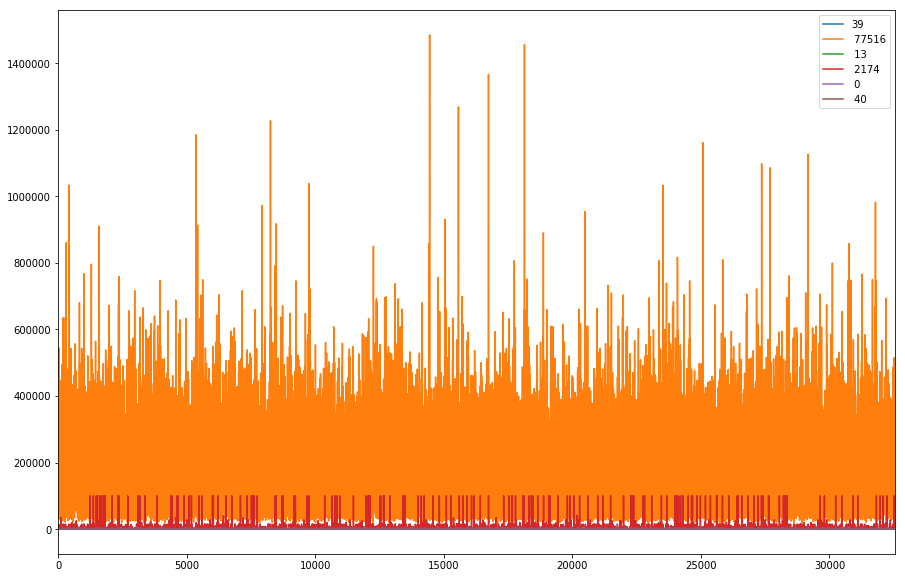

In [52]:
df.plot(figsize=(15,10)) # makes it bigger

In [53]:
df.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [0]:
# change color scheme
import matplotlib.pyplot as plt
plt.style.use('ggplot')

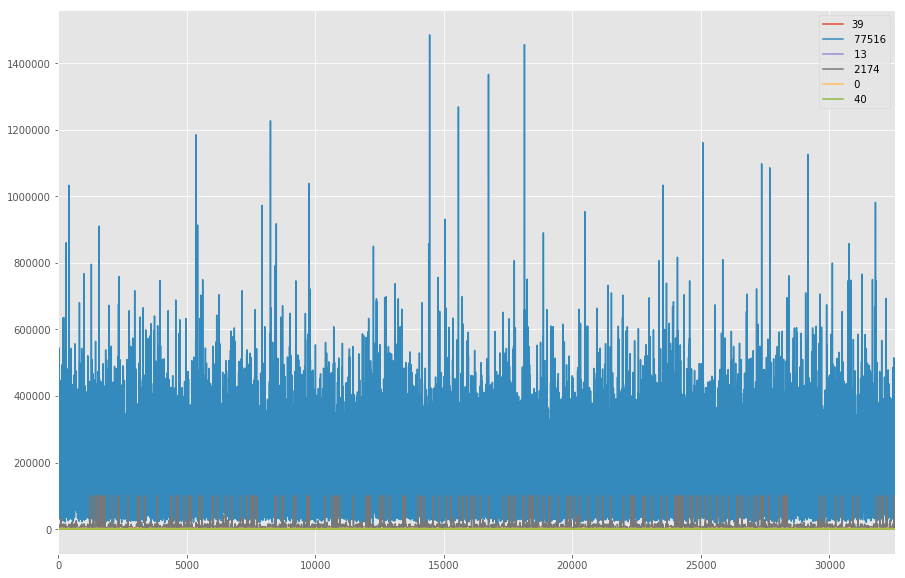

In [55]:
df.plot(figsize=(15,10))

In [0]:
# search for matplot lib styles to get different styles


In [0]:
# can use sebonr
plt.style

In [0]:
import requests

In [0]:
r = requests.get('https://cat-fact.herokuapp.com/facts')

In [0]:
json_data = r.json()

In [59]:
type(json_data)

dict

In [60]:
dict_keys(['all'])

NameError: ignored

In [61]:
json_data(['all'])

TypeError: ignored

In [62]:
json_data.keys()

dict_keys(['all'])

In [63]:
len(json_data['all'])

226

In [0]:
res = json_data['all']

In [65]:
res[:3]

[{'_id': '58e0086f0aac31001185ed02',
  'text': "Cats can't taste sweetness.",
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '58e007480aac31001185ecef',
   'name': {'first': 'Kasimir', 'last': 'Schulz'}},
  'userUpvoted': None},
 {'_id': '591d9bb2227c1a0020d26826',
  'text': 'The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.',
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '587288f6e6f85e64ae1c7ef7',
   'name': {'first': 'Alex', 'last': 'Wohlbruck'}},
  'userUpvoted': None},
 {'_id': '588e746706ac2b00110e59ff',
  'text': 'Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.',
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '588e6e8806ac2b00110e59c3',
   'name': {'first': 'Thomas', 'last': 'Lockwood'}},
  'userUpvoted': None}]

In [68]:
for i in res[:3]:
  print(i['user']['name']['first'],':', i['text'])

Kasimir : Cats can't taste sweetness.
Alex : The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.
Thomas : Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.


In [0]:
# better way  use f strings
for i in res[:3]:
  print(f"{i['user']['name']['first']} {i['user']['name']['last']}: {i['text']}")

In [0]:
d = {"a": [1,2,3], "b": [4,5,6]}
pd.DataFrame(d)

In [0]:
d = {"test": [...], "username":[...], "upvotes": []}
pd.DataFrame(d)